# CS 6476 – Problem Set 0 – Images as Functions

_Martin SAINT-JALMES_

In [1]:
# Importing the opencv library for Python
import cv2

In [2]:
# Importing numpy for matrices/images handling
import numpy as np

In [3]:
# Importing matplotlib.pyplot to embed images within this notebook
import matplotlib.pyplot as plt

## 1. Input images

In [4]:
# Loading the 2 images downloaded 
# from http://sipi.usc.edu/database/database.php?volume=misc
img1 = cv2.imread('./images/4.2.06.tiff', cv2.IMREAD_COLOR)
img2 = cv2.imread('./images/4.2.07.tiff', cv2.IMREAD_COLOR)

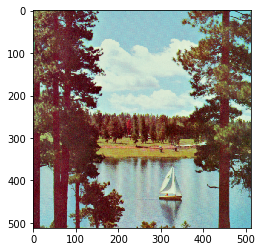

In [5]:
#Checking that both images have been loaded correctly
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)) #openCV-matplotlib format fix

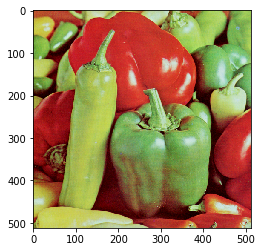

In [6]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [7]:
np.shape(img1) #images are 3-dimensional arrays

(512L, 512L, 3L)

In [8]:
#Saving them
cv2.imwrite('./out/ps0-1-a-1.tiff', img1)
cv2.imwrite('./out/ps0-1-a-2.tiff', img2)

True

## 2. Color planes

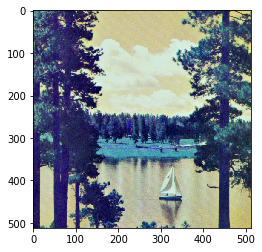

In [9]:
#Swap the red and blue pixels of image 1
img1brswap = img1.copy()

red_ch = img1brswap[:,:,2].copy() #BGR, red is the 3rd channel
blue_ch = img1brswap[:,:,0].copy() #BGR, blue is the 1st channel

img1brswap[:,:,2] = blue_ch
img1brswap[:,:,0] = red_ch
cv2.imwrite('./out/ps0-2-a.tiff', img1brswap)
plt.imshow(cv2.cvtColor(img1brswap, cv2.COLOR_BGR2RGB))

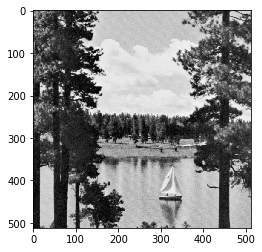

In [10]:
#Monochrome image from image 1, using only the green channel
img1Mg = img1[:,:,1].copy() #BGR, green is the 2nd channel

cv2.imwrite('./out/ps0-2-b.tiff', img1Mg)
plt.imshow(img1Mg, cmap='gray', vmin = 0, vmax = 255) # prevent plt rescale

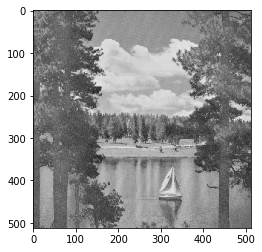

In [11]:
#Monochrome image from image 1, using only the red channel
img1Mr = img1[:,:,2].copy() #BGR, red is the 3rd channel

cv2.imwrite('./out/ps0-2-c.tiff', img1Mr)
plt.imshow(img1Mr, cmap='gray', vmin = 0, vmax = 255)

d.  
The image obtained from extracting the green channels seems to be closer to what I would expect a monochrome image to look like. The contrast and distinction between black and white parts are more accentuated, comparatively to the other image (using the red channel). In the second case, it seems like everything is closer to an in-between value, moderately grey.  
While it depends on what kind of algorithms we are looking to use and what goal we are pursuing, I think the green-channel one would be more useful when contrasts (or intensity differences) are important (e.g. identifying different zones of an image).

## 3. Replacement of pixels

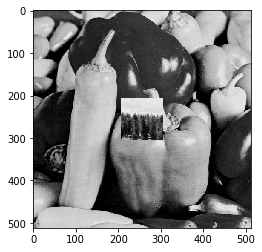

In [12]:
#Replacing inner 100 pixels square from one image by another
img2Mg = img2[:,:,1].copy()

margin = (np.shape(img1Mg)[0] - 100) / 2 #both images are the same size
img1MgInner = img1Mg[margin:-margin, margin:-margin].copy()

img2MgRep = img2Mg.copy()
img2MgRep[margin:-margin, margin:-margin] = img1MgInner

cv2.imwrite('./out/ps0-3-a.tiff', img2MgRep)
plt.imshow(img2MgRep, cmap='gray', vmin = 0, vmax = 255)

## 4. Arithmetic and Geometric operation

In [13]:
print np.min(img1Mg), np.max(img2Mg), np.mean(img1Mg), np.std(img1Mg)

0 237 124.3044548034668 77.63570734791477


The minimum and maximum pixel intensity values for the monochrome version of Image 1 are 0 and 237. The average is about 124 and the standard deviation, about 78. These values were obtained using Numpy's built-in vectorized methods.

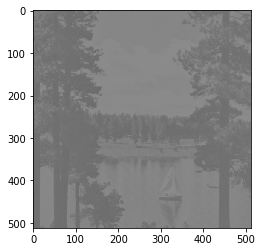

In [14]:
#Operations on the monochrome image with mean and std.
img1MgMeanStd = (img1Mg - np.mean(img1Mg))/np.std(img1Mg) * 10 + np.mean(img1Mg)
cv2.imwrite('./out/ps0-4-b.tiff', img1MgMeanStd)
plt.imshow(img1MgMeanStd, cmap='gray', vmin = 0, vmax = 255)

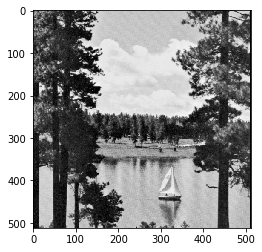

In [35]:
#Shifting the image by 2 pixels
img1MgShift = np.roll(img1Mg, shift = -2, axis = 1)
cv2.imwrite('./out/ps0-4-c.tiff', img1MgShift)
plt.imshow(img1MgShift, cmap='gray', vmin = 0, vmax = 255)

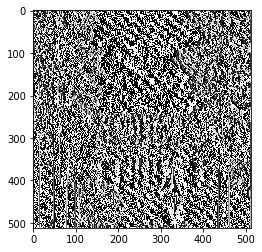

In [16]:
#Substracting the shifted image to the original
img1MgDiff = img1Mg - img1MgShift

img1MgDiff[img1MgDiff < 0] = 0
cv2.imwrite('./out/ps0-4-d.tiff', img1MgDiff)
plt.imshow(img1MgDiff, cmap='gray', vmin = 0, vmax = 255)

## 5. Noise

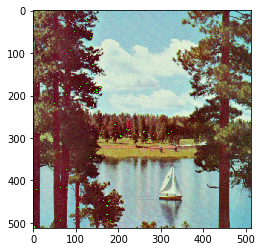

In [33]:
#Adding gaussian noise
sigma = 5

noise = np.zeros_like(img1)
noise[:,:,1] = np.random.standard_normal(np.shape(img1)[0:2]) * sigma
img1Noisy = img1 + noise
img1Noisy[img1Noisy < 0] = 0
img1Noisy[img1Noisy > 255] = 255

img1Noisy = img1Noisy
cv2.imwrite('./out/ps0-5-a.tiff', img1Noisy)
plt.imshow(cv2.cvtColor(img1Noisy, cv2.COLOR_BGR2RGB))

The noise was visible starting from sigma = 1, but I've increased it a bit (5) to have noise present in different areas.

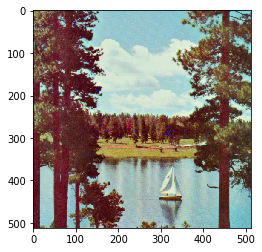

In [18]:
#Adding gaussian noise
sigma = 5

noise_blue = np.zeros_like(img1)
noise_blue[:,:,0] = np.random.standard_normal(np.shape(img1)[0:2]) * sigma
img1NoisyBlue = img1 + noise_blue
img1NoisyBlue[img1NoisyBlue < 0] = 0
img1NoisyBlue[img1NoisyBlue > 255] = 255

img1Noisy = img1Noisy
cv2.imwrite('./out/ps0-5-b.tiff', img1NoisyBlue)
plt.imshow(cv2.cvtColor(img1NoisyBlue, cv2.COLOR_BGR2RGB))

c.  
In this case, for this image and this amount of noise, the blue noise doesn't affect the image as the green noise. As the noise on the green channel happens to be very visible (green becomes prevalent over other channels) in dark areas (where the contrast is important), it is more difficult to perceive a difference with noise on the blue channel. Hence, the second image looks better.